In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# EDA
<hr>

## Table infos

In [2]:
infos = pd.read_csv('../../data/infos.csv', sep = '|')

In [3]:
infos.head()

,itemID,simulationPrice,promotion
0,1,3.43,NaN
1,2,9.15,NaN
2,3,14.04,NaN
3,4,14.10,NaN
4,5,7.48,NaN


In [4]:
infos.dtypes

itemID               int64
simulationPrice    float64
promotion           object
dtype: object

In [5]:
infos.shape

(10463, 3)

In [6]:
len(infos) - infos.count()

itemID                0
simulationPrice       0
promotion          8620
dtype: int64

In [7]:
infos['promotion'].unique()

array([nan, '2018-07-13', '2018-07-01,2018-07-02,2018-07-13',
       '2018-07-05,2018-07-11', '2018-07-05', '2018-07-01', '2018-07-04',
       '2018-07-08', '2018-07-08,2018-07-13', '2018-07-09', '2018-06-30',
       '2018-07-11', '2018-07-06', '2018-07-08,2018-07-11',
       '2018-06-30,2018-07-13', '2018-06-30,2018-07-01,2018-07-11',
       '2018-07-06,2018-07-13', '2018-07-06,2018-07-10', '2018-07-10',
       '2018-07-08,2018-07-10', '2018-06-30,2018-07-04',
       '2018-07-01,2018-07-10', '2018-07-02', '2018-06-30,2018-07-01',
       '2018-07-04,2018-07-05,2018-07-06', '2018-07-04,2018-07-05',
       '2018-07-01,2018-07-06', '2018-06-30,2018-07-06',
       '2018-07-05,2018-07-13', '2018-07-01,2018-07-02', '2018-07-03',
       '2018-07-03,2018-07-04,2018-07-05',
       '2018-07-03,2018-07-04,2018-07-06', '2018-07-03,2018-07-04',
       '2018-07-03,2018-07-05', '2018-07-04,2018-07-09',
       '2018-07-04,2018-07-06', '2018-07-02,2018-07-04', '2018-07-12',
       '2018-07-02,2018-07-0

## Table items

In [8]:
items = pd.read_csv('../../data/items.csv', sep = '|')

In [9]:
items.head()

,itemID,brand,manufacturer,customerRating,category1,category2,category3,recommendedRetailPrice
0,1,0,1,4.38,1,1,1,8.84
1,2,0,2,3.00,1,2,1,16.92
2,3,0,3,5.00,1,3,1,15.89
3,4,0,2,4.44,1,2,1,40.17
4,5,0,2,2.33,1,1,1,17.04


In [10]:
items.shape

(10463, 8)

In [11]:
items.count()

itemID                    10463
brand                     10463
manufacturer              10463
customerRating            10463
category1                 10463
category2                 10463
category3                 10463
recommendedRetailPrice    10463
dtype: int64

In [12]:
items.nunique()

itemID                    10463
brand                       275
manufacturer                253
customerRating               99
category1                     8
category2                    52
category3                     8
recommendedRetailPrice     5106
dtype: int64

## Table orders

In [13]:
orders = pd.read_csv('../../data/orders.csv', sep = '|', parse_dates=['time'])

In [14]:
orders.head()

,time,transactID,itemID,order,salesPrice
0,2018-01-01 00:01:56,2278968,450,1,17.42
1,2018-01-01 00:01:56,2278968,83,1,5.19
2,2018-01-01 00:07:11,2255797,7851,2,20.47
3,2018-01-01 00:09:24,2278968,450,1,17.42
4,2018-01-01 00:09:24,2278968,83,1,5.19


In [15]:
orders.shape

(2181955, 5)

In [16]:
orders.count()

time          2181955
transactID    2181955
itemID        2181955
order         2181955
salesPrice    2181955
dtype: int64

In [17]:
orders.dtypes

time          datetime64[ns]
transactID             int64
itemID                 int64
order                  int64
salesPrice           float64
dtype: object

In [18]:
orders.time

0         2018-01-01 00:01:56
1         2018-01-01 00:01:56
2         2018-01-01 00:07:11
3         2018-01-01 00:09:24
4         2018-01-01 00:09:24
                  ...        
2181950   2018-06-29 23:54:22
2181951   2018-06-29 23:55:09
2181952   2018-06-29 23:55:09
2181953   2018-06-29 23:55:09
2181954   2018-06-29 23:57:01
Name: time, Length: 2181955, dtype: datetime64[ns]

In [19]:
orders.time.dt.week

0           1
1           1
2           1
3           1
4           1
           ..
2181950    26
2181951    26
2181952    26
2181953    26
2181954    26
Name: time, Length: 2181955, dtype: int64

In [20]:
orders.groupby('itemID')['salesPrice'].nunique().max()

22

# Other things
<hr>

## Evalutation function

In [21]:
# custo 
# np.sum((prediction - np.maximum(prediction - target, 0) * 1.6) * simulatedPrice)

## Submission structure

In [22]:
# submission = items[['itemID']]
# submission['demandPrediction'] = 0 # prediction here
# submission.to_csv('submission.csv', sep = '|', index=False)

# First Model (aggregating by every two weeks before target)

## - Creating the structure

In [301]:
df = orders.copy()

In [302]:
df.tail()

,time,transactID,itemID,order,salesPrice
2181950,2018-06-29 23:54:22,2040347,9217,1,23.50
2181951,2018-06-29 23:55:09,2260943,2175,1,11.60
2181952,2018-06-29 23:55:09,2260943,2061,1,1.03
2181953,2018-06-29 23:55:09,2260943,2195,1,18.73
2181954,2018-06-29 23:57:01,2525,8462,1,18.93


In [303]:
df.tail().time.dt.dayofweek

2181950    4
2181951    4
2181952    4
2181953    4
2181954    4
Name: time, dtype: int64

In [304]:
# We want the last dayofweek from training to be 6

In [305]:
(df.tail().time.dt.dayofyear + 2) // 7

2181950    26
2181951    26
2181952    26
2181953    26
2181954    26
Name: time, dtype: int64

In [306]:
(df.head().time.dt.dayofyear + 2) // 7

0    0
1    0
2    0
3    0
4    0
Name: time, dtype: int64

In [307]:
df['week'] = (df.time.dt.dayofyear + 2 + 7) // 14
# + 7 because we want weeks 25 and 26 to be together, week 0 will be discarded

In [308]:
maxx = df.week.max()
minn = df.week.min()
minn, maxx

(0, 13)

In [309]:
n_items = items['itemID'].nunique()
print('total number of items:', n_items)
print('expected number of instances:', n_items * (maxx + 1))

total number of items: 10463
expected number of instances: 146482


In [342]:
mi = pd.MultiIndex.from_product([range(0, maxx + 1), items['itemID']], names=['week', 'itemID'])
data = pd.DataFrame(index = mi)

In [343]:
data = data.join(df.groupby(['week', 'itemID'])[['order']].sum(), how = 'left')

In [344]:
data.fillna(0, inplace = True)

In [345]:
data.groupby('itemID').count().min()

order    14
dtype: int64

In [346]:
df

,time,transactID,itemID,order,salesPrice,week
0,2018-01-01 00:01:56,2278968,450,1,17.42,0
1,2018-01-01 00:01:56,2278968,83,1,5.19,0
2,2018-01-01 00:07:11,2255797,7851,2,20.47,0
3,2018-01-01 00:09:24,2278968,450,1,17.42,0
4,2018-01-01 00:09:24,2278968,83,1,5.19,0
...,...,...,...,...,...,...
2181950,2018-06-29 23:54:22,2040347,9217,1,23.50,13
2181951,2018-06-29 23:55:09,2260943,2175,1,11.60,13
2181952,2018-06-29 23:55:09,2260943,2061,1,1.03,13
2181953,2018-06-29 23:55:09,2260943,2195,1,18.73,13


In [347]:
df.groupby('itemID')['salesPrice'].nunique().describe()

count    9840.000000
mean        2.375407
std         1.902204
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        22.000000
Name: salesPrice, dtype: float64

In [348]:
df.groupby('itemID')['salesPrice'].median()

itemID
1          3.11
2          9.15
3         14.04
4         14.10
5          7.84
          ...  
10450     55.65
10459     14.71
10460    325.67
10462    304.30
10463    282.16
Name: salesPrice, Length: 9840, dtype: float64

## - Creating features

In [349]:
# rolling window example with shift
random_df = pd.DataFrame({'B': [0, 1, 2, 3, 4]})
random_df.shift(1).rolling(2).sum()

,B
0,NaN
1,NaN
2,1.0
3,3.0
4,5.0


In [350]:
data.reset_index(inplace = True)

In [351]:
data = pd.merge(data, items[['itemID', 'manufacturer', 'category1', 'category2', 'category3']], on = 'itemID')

In [352]:
# I am going to create three features: the mean of the orders of the last [1, 2, 4] weeks for each item 

In [353]:
# TODO:
# longer windows
# aggregating by other features
# week pairs since last peek
# week pairs from 2nd last to last peek
# 

In [354]:
data.sort_values('week', inplace = True)

In [355]:
data

,week,itemID,order,manufacturer,category1,category2,category3
0,0,1,0.0,1,1,1,1
113596,0,8115,0.0,121,4,38,7
28784,0,2057,0.0,57,2,10,2
113582,0,8114,0.0,121,4,38,7
28798,0,2058,0.0,57,2,10,2
...,...,...,...,...,...,...,...
94373,13,6741,0.0,3,7,24,6
12487,13,892,3.0,6,1,5,1
45597,13,3257,0.0,86,2,8,2
12515,13,894,0.0,6,1,5,1


In [356]:
# features = [
#     ('itemID', 'item'),
#     ('manufacturer', 'manuf'),
#     ('category1', 'cat1'),
#     ('category2', 'cat2'),
#     ('category3', 'cat3')
# ]
# for f, n in features:
#     if f not in data.columns:
#         print('ops', f)

In [357]:
features = [('itemID', 'item')]

In [358]:
# f, name = ('manufacturer', 'manuf')
for f, name in features:
    print(f)
    temp = data.groupby([f, 'week'])[['order']].sum()
    shifted = temp.groupby(f)[['order']].shift(1)
    new_feature_block = pd.DataFrame()
    for n in range(3):
        rolled = shifted.groupby(f, as_index = False)['order'].rolling(2 ** n).mean()
        new_feature_block['%s_%d' % (name, 2 ** n)] = rolled.reset_index(0, drop = True) # rolling has a weird index behavior...
    data = pd.merge(data, new_feature_block.reset_index(), on = [f, 'week'])

itemID


In [359]:
data.count() # the larger the window, more NaN are expected

week            146482
itemID          146482
order           146482
manufacturer    146482
category1       146482
category2       146482
category3       146482
item_1          136019
item_2          125556
item_4          104630
dtype: int64

In [360]:
data.fillna(-1, inplace=True)

In [361]:
# checking if we got what we wanted
data.query('itemID == 1')

,week,itemID,order,manufacturer,category1,category2,category3,item_1,item_2,item_4
0,0,1,0.0,1,1,1,1,-1.0,-1.0,-1.00
20862,1,1,0.0,1,1,1,1,0.0,-1.0,-1.00
31381,2,1,313.0,1,1,1,1,0.0,0.0,-1.00
31798,3,1,4.0,1,1,1,1,313.0,156.5,-1.00
42739,4,1,35.0,1,1,1,1,4.0,158.5,79.25
53486,5,1,2.0,1,1,1,1,35.0,19.5,88.00
72640,6,1,0.0,1,1,1,1,2.0,18.5,88.50
83223,7,1,1.0,1,1,1,1,0.0,1.0,10.25
87653,8,1,300.0,1,1,1,1,1.0,0.5,9.50
97012,9,1,2.0,1,1,1,1,300.0,150.5,75.75


##  - fit, predict

In [362]:
# max expected rmse
from sklearn.metrics import mean_squared_error as mse
# pred = data.loc[1:12].groupby('itemID')['order'].mean().sort_index()
# target_week = data.loc[13:, 'order'].reset_index(level = 0, drop = True).sort_index()
# mse(target_week, pred) ** .5

In [363]:
train = data.query('1 <= week <= 11').reset_index()
test = data.query('week == 12').reset_index()

In [364]:
weights = infos.set_index('itemID')['simulationPrice'].to_dict()

In [365]:
y_train = train.pop('order').values
y_test = test.pop('order').values

X_train = train.values
X_test = test.values

w_train = train['itemID'].map(weights)
w_test = test['itemID'].map(weights)

In [366]:
import xgboost as xgb

In [367]:
# custom feval

def feval(prediction: np.ndarray, dtrain: xgb.DMatrix):
    prediction = prediction.astype(int)
    target = dtrain.get_label()
    simulatedPrice = dtrain.get_weight()
    return 'feval', -np.sum((prediction - np.maximum(prediction - target, 0) * 1.6)  * simulatedPrice)

In [423]:
# custom objective

def gradient(predt, dtrain):
    y = dtrain.get_label()
    sp = dtrain.get_weight()
    return -2 * (predt - np.maximum(predt - y, 0) * 1.6) * (1 - (predt > y) * 1.6)

def hessian(predt, dtrain):
    y = dtrain.get_label()
    sp = dtrain.get_weight() 
    return -2 * (1 - (predt > y) * 1.6) ** 2

def objective(predt, dtrain):
    grad = gradient(predt, dtrain)
    hess = hessian(predt, dtrain)
    return grad, hess

In [429]:
dtrain = xgb.DMatrix(X_train, y_train, w_train, missing = -1)
dtest = xgb.DMatrix(X_test, y_test, w_test, missing = -1)
# specify parameters via map
param = {
    'max_depth':5,
    'eta':0.001,
    'objective':'reg:squarederror',
    'disable_default_eval_metric': 1
}
num_round = 400
bst = xgb.train(param, dtrain,
                num_round, early_stopping_rounds = 5,
                obj = objective,
                feval = feval,
                evals = [(dtrain, 'train'), (dtest, 'test')])

[0]	train-feval:-0.00000	test-feval:-0.00000
Multiple eval metrics have been passed: 'test-feval' will be used for early stopping.

Will train until test-feval hasn't improved in 5 rounds.
[1]	train-feval:-0.00000	test-feval:-0.00000
[2]	train-feval:-0.00000	test-feval:-0.00000
[3]	train-feval:-0.00000	test-feval:-0.00000
[4]	train-feval:-0.00000	test-feval:-0.00000
[5]	train-feval:-0.00000	test-feval:-0.00000
Stopping. Best iteration:
[0]	train-feval:-0.00000	test-feval:-0.00000



In [430]:
sub = data.query('week == 13').reset_index()

In [431]:
y_sub = sub.pop('order').values
X_sub = test.values
w_sub = sub['itemID'].map(weights)

In [432]:
dsub = xgb.DMatrix(X_sub, missing = -1)

In [433]:
submission = items[['itemID']]
submission['demandPrediction'] = bst.predict(dsub).astype(int)
submission.to_csv('../../submissions/sub_inclass_02.csv', sep = '|', index=False)
# submission.head()

/home/tobs/miniconda3/envs/dmc/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [434]:
prediction = bst.predict(dsub).astype(int)
simulatedPrice = w_sub
target = y_sub
-np.sum((prediction - np.maximum(prediction - target, 0) * 1.6)  * simulatedPrice)

-0.0

In [435]:
prediction.sum()

0

<hr>

In [ ]:
# Linear Regression

In [401]:
def evaluate(prediction, target, simulatedPrice):
    return np.sum((prediction - np.maximum(prediction - target, 0) * 1.6)  * simulatedPrice)

In [398]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import 

In [399]:
lr = LinearRegression()

In [408]:
lr.fit(X_train, y_train, w_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [409]:
print('train', evaluate(lr.predict(X_train), y_train, w_train))
print('test', evaluate(lr.predict(X_test), y_test, w_test))
print('sub', evaluate(lr.predict(X_sub), y_sub, w_sub))

train -21616860.89586201
test -2597637.322313344
sub -7671684.811105296


<hr>

In [294]:
# wtf is happening?

In [463]:
data.query('itemID == 10')

,itemID,week,order,manufacturer,category1,category2,category3,item_1,item_2,item_4,...,manuf_4,cat1_1,cat1_2,cat1_4,cat2_1,cat2_2,cat2_4,cat3_1,cat3_2,cat3_4
608,10,0,0.0,4,1,1,1,-1.0,-1.0,-1.00,...,-1.00,-1.0,-1.0,-1.00,-1.0,-1.0,-1.00,-1.0,-1.0,-1.00
20119,10,1,0.0,4,1,1,1,0.0,-1.0,-1.00,...,-1.00,5626.0,-1.0,-1.00,2226.0,-1.0,-1.00,5626.0,-1.0,-1.00
30663,10,2,0.0,4,1,1,1,0.0,0.0,-1.00,...,-1.00,20233.0,12929.5,-1.00,7576.0,4901.0,-1.00,20233.0,12929.5,-1.00
39127,10,3,1.0,4,1,1,1,0.0,0.0,-1.00,...,-1.00,10732.0,15482.5,-1.00,6135.0,6855.5,-1.00,10732.0,15482.5,-1.00
50295,10,4,358.0,4,1,1,1,1.0,0.5,0.25,...,203.25,8367.0,9549.5,11239.50,3119.0,4627.0,4764.00,8367.0,9549.5,11239.50
54446,10,5,0.0,4,1,1,1,358.0,179.5,89.75,...,930.75,15971.0,12169.0,13825.75,7895.0,5507.0,6181.25,15971.0,12169.0,13825.75
72713,10,6,64.0,4,1,1,1,0.0,179.0,89.75,...,928.75,23765.0,19868.0,14708.75,8810.0,8352.5,6489.75,23765.0,19868.0,14708.75
74211,10,7,0.0,4,1,1,1,64.0,32.0,105.75,...,1045.75,9763.0,16764.0,14466.50,3430.0,6120.0,5813.50,9763.0,16764.0,14466.50
89368,10,8,5.0,4,1,1,1,0.0,32.0,105.50,...,1190.50,18263.0,14013.0,16940.50,5483.0,4456.5,6404.50,18263.0,14013.0,16940.50
100513,10,9,0.0,4,1,1,1,5.0,2.5,17.25,...,514.75,21326.0,19794.5,18279.25,10806.0,8144.5,7132.25,21326.0,19794.5,18279.25


In [464]:
data.query('itemID == 100')

,itemID,week,order,manufacturer,category1,category2,category3,item_1,item_2,item_4,...,manuf_4,cat1_1,cat1_2,cat1_4,cat2_1,cat2_2,cat2_4,cat3_1,cat3_2,cat3_4
598,100,0,0.0,4,1,1,1,-1.0,-1.0,-1.00,...,-1.00,-1.0,-1.0,-1.00,-1.0,-1.0,-1.00,-1.0,-1.0,-1.00
20102,100,1,0.0,4,1,1,1,0.0,-1.0,-1.00,...,-1.00,5626.0,-1.0,-1.00,2226.0,-1.0,-1.00,5626.0,-1.0,-1.00
30665,100,2,0.0,4,1,1,1,0.0,0.0,-1.00,...,-1.00,20233.0,12929.5,-1.00,7576.0,4901.0,-1.00,20233.0,12929.5,-1.00
39144,100,3,0.0,4,1,1,1,0.0,0.0,-1.00,...,-1.00,10732.0,15482.5,-1.00,6135.0,6855.5,-1.00,10732.0,15482.5,-1.00
50305,100,4,0.0,4,1,1,1,0.0,0.0,0.00,...,203.25,8367.0,9549.5,11239.50,3119.0,4627.0,4764.00,8367.0,9549.5,11239.50
54447,100,5,0.0,4,1,1,1,0.0,0.0,0.00,...,930.75,15971.0,12169.0,13825.75,7895.0,5507.0,6181.25,15971.0,12169.0,13825.75
72710,100,6,96.0,4,1,1,1,0.0,0.0,0.00,...,928.75,23765.0,19868.0,14708.75,8810.0,8352.5,6489.75,23765.0,19868.0,14708.75
74202,100,7,0.0,4,1,1,1,96.0,48.0,24.00,...,1045.75,9763.0,16764.0,14466.50,3430.0,6120.0,5813.50,9763.0,16764.0,14466.50
89377,100,8,0.0,4,1,1,1,0.0,48.0,24.00,...,1190.50,18263.0,14013.0,16940.50,5483.0,4456.5,6404.50,18263.0,14013.0,16940.50
100509,100,9,71.0,4,1,1,1,0.0,0.0,24.00,...,514.75,21326.0,19794.5,18279.25,10806.0,8144.5,7132.25,21326.0,19794.5,18279.25


In [465]:
data.query('itemID == 1000')

,itemID,week,order,manufacturer,category1,category2,category3,item_1,item_2,item_4,...,manuf_4,cat1_1,cat1_2,cat1_4,cat2_1,cat2_2,cat2_4,cat3_1,cat3_2,cat3_4
940,1000,0,0.0,30,1,3,1,-1.0,-1.0,-1.00,...,-1.00,-1.0,-1.0,-1.00,-1.0,-1.0,-1.00,-1.0,-1.0,-1.00
20832,1000,1,0.0,30,1,3,1,0.0,-1.0,-1.00,...,-1.00,5626.0,-1.0,-1.00,376.0,-1.0,-1.00,5626.0,-1.0,-1.00
31277,1000,2,0.0,30,1,3,1,0.0,0.0,-1.00,...,-1.00,20233.0,12929.5,-1.00,1079.0,727.5,-1.00,20233.0,12929.5,-1.00
40434,1000,3,0.0,30,1,3,1,0.0,0.0,-1.00,...,-1.00,10732.0,15482.5,-1.00,574.0,826.5,-1.00,10732.0,15482.5,-1.00
51366,1000,4,0.0,30,1,3,1,0.0,0.0,0.00,...,34.75,8367.0,9549.5,11239.50,768.0,671.0,699.25,8367.0,9549.5,11239.50
55815,1000,5,2.0,30,1,3,1,0.0,0.0,0.00,...,39.00,15971.0,12169.0,13825.75,1528.0,1148.0,987.25,15971.0,12169.0,13825.75
72241,1000,6,62.0,30,1,3,1,2.0,1.0,0.50,...,70.00,23765.0,19868.0,14708.75,3546.0,2537.0,1604.00,23765.0,19868.0,14708.75
73771,1000,7,0.0,30,1,3,1,62.0,32.0,16.00,...,93.75,9763.0,16764.0,14466.50,737.0,2141.5,1644.75,9763.0,16764.0,14466.50
90085,1000,8,23.0,30,1,3,1,0.0,31.0,16.00,...,96.25,18263.0,14013.0,16940.50,415.0,576.0,1556.50,18263.0,14013.0,16940.50
100920,1000,9,0.0,30,1,3,1,23.0,11.5,21.75,...,124.50,21326.0,19794.5,18279.25,1482.0,948.5,1545.00,21326.0,19794.5,18279.25


In [291]:
zeros = data.groupby('itemID')['order'].apply(lambda x : (x == 0).mean())

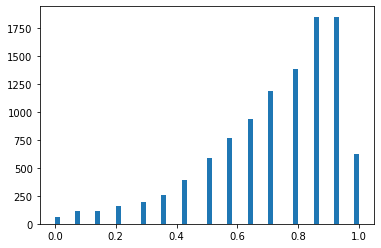

In [293]:
plt.hist(zeros, bins = 60);

In [52]:
orders['total_income'] = orders['salesPrice'] * orders['order']

In [53]:
itemtotal = orders.groupby('itemID')['total_income'].sum()

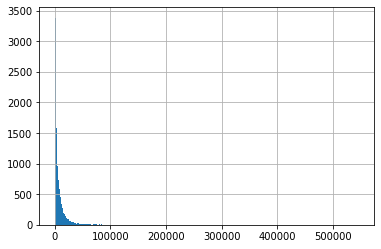

In [54]:
itemtotal.hist(bins = 300)

In [55]:
itemtotal.sort_values().iloc[-10:]

itemID
9377    250413.37
7661    257203.62
4426    333086.39
4588    418976.74
4965    421690.09
7625    445636.64
5035    488284.75
672     515476.81
320     518516.20
35      546429.52
Name: total_income, dtype: float64

In [56]:
top10 = itemtotal.sort_values().iloc[-10:].index

In [92]:
for i in top10:
    print(data.query('itemID == @i'))

        week  itemID  order  manufacturer  category1  category2  category3  \
2520       0    9377    0.0           128          8         44          8   
17063      1    9377    0.0           128          8         44          8   
26748      2    9377    0.0           128          8         44          8   
33940      3    9377    0.0           128          8         44          8   
51172      4    9377    0.0           128          8         44          8   
56732      5    9377    0.0           128          8         44          8   
63231      6    9377   30.0           128          8         44          8   
77720      7    9377    3.0           128          8         44          8   
84108      8    9377    8.0           128          8         44          8   
104483     9    9377   10.0           128          8         44          8   
114621    10    9377    2.0           128          8         44          8   
117349    11    9377    0.0           128          8         44 

In [61]:
importance = (itemtotal / itemtotal.sum()).sort_values(ascending = False)

In [62]:
importance

itemID
35      6.130133e-03
320     5.816986e-03
672     5.782889e-03
5035    5.477834e-03
7625    4.999385e-03
            ...     
4857    2.243705e-08
8641    2.221268e-08
4429    1.671560e-08
5913    1.559375e-08
6990    1.492064e-08
Name: total_income, Length: 9840, dtype: float64

In [63]:
importance.cumsum()

itemID
35      0.006130
320     0.011947
672     0.017730
5035    0.023208
7625    0.028207
          ...   
4857    1.000000
8641    1.000000
4429    1.000000
5913    1.000000
6990    1.000000
Name: total_income, Length: 9840, dtype: float64

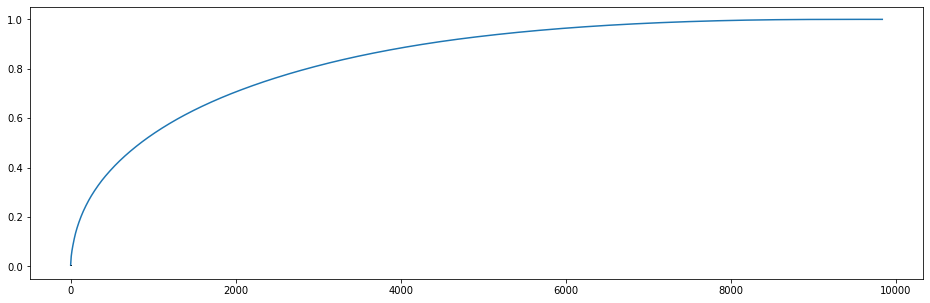

In [67]:
plt.figure(figsize=(16, 5))
plt.vlines(range(len(importance)), 0, importance)
plt.plot(range(len(importance)), importance.cumsum())

In [ ]:
# fazer feature que pega o percentil de quando o item deu de dinheiro dentro de uma categoria